In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from numpy.lib.function_base import average
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
! git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
df=pd.read_csv('ML-datasets/olympic.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df.sort_values('Games').head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
132219,66542,Leonidas Lanngakis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",NaN


In [ ]:
df.sort_values('Games', ascending=False).head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
198703,99780,Maximilian Reinelt,M,27.0,195.0,98.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,Silver


#Dane obejmują olimpiady w latach 1896 - 2016.

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
sort_country=olympic['NOC'].unique()
sort_country.sort()
sort_country

array(['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG',
       'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR',
       'BDI', 'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOH',
       'BOL', 'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM',
       'CAN', 'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD',
       'COK', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB', 'CYP',
       'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'ERI', 'ESA',
       'ESP', 'EST', 'ETH', 'EUN', 'FIJ', 'FIN', 'FRA', 'FRG', 'FSM',
       'GAB', 'GAM', 'GBR', 'GBS', 'GDR', 'GEO', 'GEQ', 'GER', 'GHA',
       'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY', 'HAI', 'HKG', 'HON',
       'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR',
       'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAO', 'LAT', 'LBA', 'LBR',
       'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAL', 'MAR',
       'MAS', 'MAW',

In [ ]:
len(sort_country) 

230

#Ile procentowo jest osób z medalami w stosunku do całego zbioru (271 116)? 

In [ ]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
df['MedalOrNot']=np.where(df.Medal.isna(), 0, 1)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,med,MedalOrNot
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0


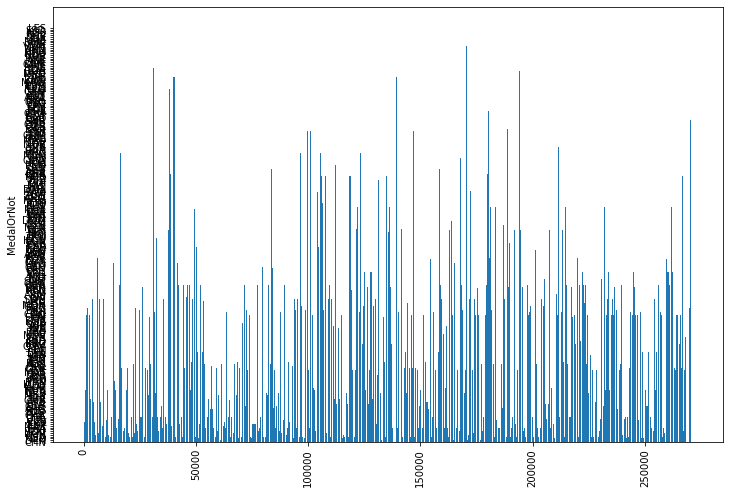

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))

ax.bar(df.index, df['NOC'])
ax.set_ylabel('MedalOrNot')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [ ]:
df['MedalOrNot'].sum()

39783

#